In [18]:
import matplotlib.pyplot as plt

In [1]:
import requests

In [35]:
# from urllib2 import Request, urlopen
import json

import pandas as pd 

from pandas.io.json import json_normalize
from pandas_datareader import data

# path1 = '42.974049,-81.205203|42.974298,-81.195755'
# request=Request('http://maps.googleapis.com/maps/api/elevation/json?locations='+path1+'&sensor=false')
# response = urlopen(request)
# elevations = response.read()
# data = json.loads(elevations)
# df = pd.json_normalize(data['results'])


In [84]:
def get_stock_data(ticker, start_date, end_date):
    api_key = '50dbca4a8576228510cb129fe07db8e9a178bb9b'
    base_url = (f'https://api.tiingo.com/tiingo/daily/{ticker}/prices?')
    payload = {
        'token': api_key, 
        'startDate': start_date,
        'endDate': end_date
    }
    data_response = requests.get(base_url, params=payload)
    json_data = data_response.json()
#     df = json_normalize(response)
#     elevations = response.read()
#     data = json.loads(str(response))
#     df = pd.json_normalize(data)
    df = pd.json_normalize(json_data)
    df = df[['date', 'close']]
#     df.reset_index(level=0, inplace=True)
    return df
# panel_data = data.DataReader('INPX', 'google', start_date, end_date)

In [85]:
# panel_data = data.DataReader('INPX', 'google', start_date, end_date)

In [86]:
data_response = get_stock_data('LMND', '2020-06-01', '2020-10-31')
# print(data_response.url)
# print(data_response.json())
print(data_response.head())

                       date  close
0  2020-07-02T00:00:00.000Z  69.41
1  2020-07-06T00:00:00.000Z  81.19
2  2020-07-07T00:00:00.000Z  78.79
3  2020-07-08T00:00:00.000Z  68.51
4  2020-07-09T00:00:00.000Z  77.01


In [87]:
data_response['date']

0     2020-07-02T00:00:00.000Z
1     2020-07-06T00:00:00.000Z
2     2020-07-07T00:00:00.000Z
3     2020-07-08T00:00:00.000Z
4     2020-07-09T00:00:00.000Z
                ...           
80    2020-10-26T00:00:00.000Z
81    2020-10-27T00:00:00.000Z
82    2020-10-28T00:00:00.000Z
83    2020-10-29T00:00:00.000Z
84    2020-10-30T00:00:00.000Z
Name: date, Length: 85, dtype: object

(['2020-07-02T00:00:00.000Z',
  '2020-07-06T00:00:00.000Z',
  '2020-07-07T00:00:00.000Z',
  '2020-07-08T00:00:00.000Z',
  '2020-07-09T00:00:00.000Z',
  '2020-07-10T00:00:00.000Z',
  '2020-07-13T00:00:00.000Z',
  '2020-07-14T00:00:00.000Z',
  '2020-07-15T00:00:00.000Z',
  '2020-07-16T00:00:00.000Z'],
 [69.41, 81.19, 78.79, 68.51, 77.01, 84.66, 78.5, 76.14, 74.17, 79.29])

In [13]:
# def create_datasets(ticker, start_date, end_date):
#     data_response = get_stock_data('LMND', '2020-06-01', '2020-10-31')
#     dates, closes= parse_data(data_response)
    
    
# #     labels = calculate_price_difference(opens, closes)
    
#     inputs = []
#     for i in range(len(dates)):
#         inputs.append([closes[i]])
        
#     return dates, closes
    

## Create Training Data

In [88]:
x_train, y_train = get_stock_data('LMND', '2020-06-01', '2020-08-31')
x_test, y_test = get_stock_data('LMND', '2020-06-01', '2020-10-31')

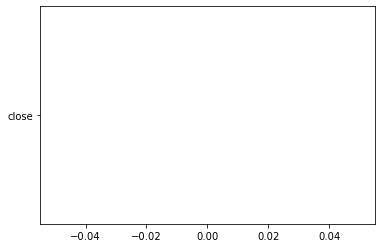

In [89]:
plt.plot(y_train)
plt.show(y_train)

## Start Model Building W/ CSV

In [ ]:
import pandas as pd 


In [135]:
df = pd.read_csv('Data/CAKE.csv', header=0, usecols=['Date', 'Close'], parse_dates=True, index_col='Date')
df.head()

,Close
Date,
2018-11-01,48.590000
2018-11-02,49.169998
2018-11-05,50.320000
2018-11-06,51.430000
2018-11-07,52.290001


In [136]:
df.tail()

,Close
Date,
2020-10-26,30.639999
2020-10-27,30.430000
2020-10-28,29.049999
2020-10-29,29.940001
2020-10-30,29.719999


## Perform EDA

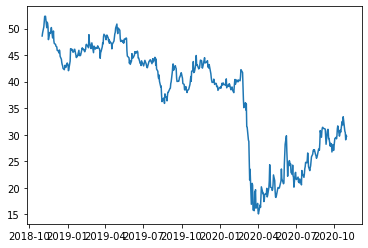

In [137]:
import matplotlib.pyplot as plt 

plt.plot(df['Close'])
plt.show()

## Scale Data

In [138]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)


## Test Train Split

In [139]:
train_length = int(len(scaled_data) * .7)
test_length = len(scaled_data) - train_length
train_data = scaled_data[0:train_length, :]
test_data = scaled_data[train_length: len(scaled_data), :]

In [140]:
# turn data into np arrays
import numpy as np 

In [141]:
def create_dataset(dataset, timestep):
    data_x, data_y = [], []
    
    for i in range(len(dataset)-timestep-1):
        data_x.append(dataset[i:(i+timestep),0])
        data_y.append(dataset[i+timestep,0])
        
    return np.array(data_x), np.array(data_y)
        

In [142]:
timestep = 1 
train_x, train_y = create_dataset(train_data, timestep)
test_x, test_y = create_dataset(test_data, timestep)

print(train_x[:10])

[[0.90002685]
 [0.915614  ]
 [0.94651973]
 [0.97635042]
 [0.99946251]
 [0.9997312 ]
 [1.        ]
 [0.94195112]
 [0.97016931]
 [0.96452569]]


In [143]:
print(train_x.shape)

(350, 1)


In [144]:
train_x = np.reshape(train_x, (train_x.shape[0], 1, train_x.shape[1]))
test_x = np.reshape(test_x, (test_x.shape[0], 1, test_x.shape[1]))
print(train_x)

[[[0.90002685]]

 [[0.915614  ]]

 [[0.94651973]]

 [[0.97635042]]

 [[0.99946251]]

 [[0.9997312 ]]

 [[1.        ]]

 [[0.94195112]]

 [[0.97016931]]

 [[0.96452569]]

 [[0.94598221]]

 [[0.88175219]]

 [[0.91642032]]

 [[0.91857023]]

 [[0.91507662]]

 [[0.9427573 ]]

 [[0.89035203]]

 [[0.89062083]]

 [[0.92528885]]

 [[0.87557106]]

 [[0.86240253]]

 [[0.85783389]]

 [[0.84869656]]

 [[0.84493416]]

 [[0.82746569]]

 [[0.82343459]]

 [[0.81456595]]

 [[0.8293469 ]]

 [[0.8258533 ]]

 [[0.79709748]]

 [[0.78258533]]

 [[0.76538568]]

 [[0.75517335]]

 [[0.74926093]]

 [[0.73609248]]

 [[0.72964255]]

 [[0.75221713]]

 [[0.7444235 ]]

 [[0.7414673 ]]

 [[0.76350436]]

 [[0.75302333]]

 [[0.72453642]]

 [[0.73394247]]

 [[0.77317921]]

 [[0.83579683]]

 [[0.8331093 ]]

 [[0.82827189]]

 [[0.83337813]]

 [[0.81752215]]

 [[0.82101589]]

 [[0.82343459]]

 [[0.83257192]]

 [[0.83284061]]

 [[0.79091637]]

 [[0.79978501]]

 [[0.79602258]]

 [[0.80112871]]

 [[0.82773451]]

 [[0.80112871]

## Build Our Model

In [145]:
from keras.models import Sequential 
from keras.layers import LSTM, Dense 

In [146]:
model = Sequential()

# add our layers 

# add an lstm layer
model.add(LSTM(256, input_shape=(1,1)))
model.add(Dense(1, activation='relu'))

# set our loss and optimize 
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 256)               264192    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 264,449
Trainable params: 264,449
Non-trainable params: 0
_________________________________________________________________
None


# Train & Fit Model

In [147]:
model.fit(train_x, train_y, epochs=1, batch_size=1, verbose=1)
score = model.evaluate(train_x, train_y, verbose=0)
print('Keras model loss =', score[0])
print('Keras model accuracy =', score[1])

350/350 [==============================] - 1s 3ms/step - loss: 0.0394 - accuracy: 0.0000e+00
Keras model loss = 0.004374357406049967
Keras model accuracy = 0.0028571428265422583


## Evaluating Model

In [148]:
train_preds = model.predict(train_x)
test_preds = model.predict(test_x)

train_preds

array([[0.8379929 ],
       [0.8479035 ],
       [0.86760294],
       [0.8866781 ],
       [0.90149784],
       [0.90167063],
       [0.9018432 ],
       [0.8646867 ],
       [0.8827208 ],
       [0.8791098 ],
       [0.86725974],
       [0.82639444],
       [0.84841686],
       [0.8497851 ],
       [0.8475616 ],
       [0.86520123],
       [0.8318496 ],
       [0.8320203 ],
       [0.8540633 ],
       [0.8224764 ],
       [0.81413823],
       [0.8112484 ],
       [0.80547255],
       [0.80309606],
       [0.7920747 ],
       [0.78953457],
       [0.7839495 ],
       [0.7932607 ],
       [0.7910585 ],
       [0.77296484],
       [0.7638556 ],
       [0.7530781 ],
       [0.74668884],
       [0.7429931 ],
       [0.73477054],
       [0.7307477 ],
       [0.7448406 ],
       [0.73997104],
       [0.7381251 ],
       [0.75190043],
       [0.7453445 ],
       [0.72756517],
       [0.7334292 ],
       [0.75795907],
       [0.79732835],
       [0.79563314],
       [0.792583  ],
       [0.795

In [149]:
train_preds = scaler.inverse_transform(train_preds)
train_y = scaler.inverse_transform([train_y])

test_preds = scaler.inverse_transform(test_preds)
test_y = scaler.inverse_transform([test_y])

print(train_preds)

[[46.281715]
 [46.65049 ]
 [47.383507]
 [48.093292]
 [48.644733]
 [48.65117 ]
 [48.657585]
 [47.274994]
 [47.94604 ]
 [47.81168 ]
 [47.370735]
 [45.850136]
 [46.669594]
 [46.720505]
 [46.637768]
 [47.29414 ]
 [46.053123]
 [46.059475]
 [46.879696]
 [45.704346]
 [45.394085]
 [45.286552]
 [45.071636]
 [44.983204]
 [44.5731  ]
 [44.47858 ]
 [44.27076 ]
 [44.61723 ]
 [44.53529 ]
 [43.862022]
 [43.523067]
 [43.122036]
 [42.884293]
 [42.746773]
 [42.44081 ]
 [42.291122]
 [42.81552 ]
 [42.634323]
 [42.565636]
 [43.078217]
 [42.83427 ]
 [42.1727  ]
 [42.3909  ]
 [43.30366 ]
 [44.76859 ]
 [44.705513]
 [44.592014]
 [44.71182 ]
 [44.340015]
 [44.42188 ]
 [44.47858 ]
 [44.6929  ]
 [44.699207]
 [43.717583]
 [43.92486 ]
 [43.8369  ]
 [43.956276]
 [44.579407]
 [43.956276]
 [44.11975 ]
 [43.93743 ]
 [43.993996]
 [44.61723 ]
 [44.875862]
 [44.705513]
 [44.680286]
 [44.730743]
 [44.402977]
 [44.636147]
 [44.661373]
 [45.19803 ]
 [45.292873]
 [44.957947]
 [44.882183]
 [46.4406  ]
 [45.609318]
 [44.945312]

In [152]:
train_predict_plot = np.empty_like(scaled_data)
# create an empty array
train_predict_plot[:,:] = np.nan
train_predict_plot[1:len(train_preds)+1, :] = train_preds 

In [154]:
test_predict_plot = np.empty_like(scaled_data)
# create an empty array
test_predict_plot[:,:] = np.nan
test_predict_plot[len(train_preds)+2+1:len(scaled_data)-1, :] = test_preds 

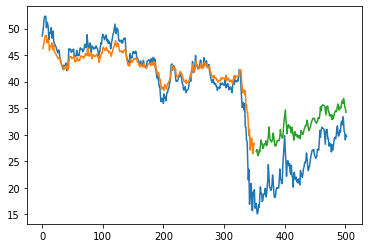

In [155]:
# blue
plt.plot(scaler.inverse_transform(scaled_data))
# orange
plt.plot(train_predict_plot)
# green
plt.plot(test_predict_plot)
plt.show()